In [1]:
using Plots
using LinearAlgebra


using Distributions

┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1278
┌ Info: Precompiling Distributions [31c24e10-a181-5473-b8eb-7969acd0382f]
└ @ Base loading.jl:1278


In [2]:
include("exponentail_growth_filter.jl")

Main.exponentail_growth_filter

In [3]:
# paramters
sigma_nu = 0.1
sigma_omega = 0.5
r0 = 1.1
r1 = 0.9
r = 0.9
d = Distributions.Normal(0, sigma_nu)
d_sample = Distributions.Normal(0, sigma_omega)


Normal{Float64}(μ=0.0, σ=0.5)

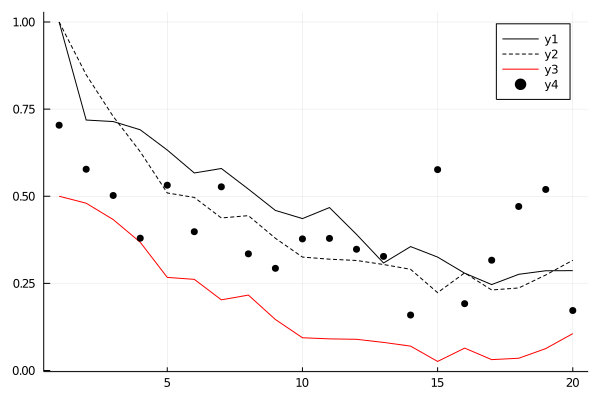

In [4]:
N = 20
x_t = zeros(N)
x_t_hat0 = zeros(N)
x_t_hat1 = zeros(N)
x_t_mean = zeros(N)
p_t_ls = zeros(N)
sigma_t_ls = zeros(N)
O_t_ls = zeros(N)

log_x_t = log(1.0)
log_x_t_hat0 = log_x_t
log_x_t_hat1 = log_x_t
sigma_t = 1.0
p_t = 0.5

for i in 1:N
    # save values 
    x_t[i] = exp(log_x_t)
    x_t_hat0[i] = exp(log_x_t_hat0)
    x_t_hat1[i] = exp(log_x_t_hat1)
    x_t_mean[i] = exp(p_t*log_x_t_hat0 + (1-p_t)*log_x_t_hat1)
    p_t_ls[i] = p_t
    sigma_t_ls[i] = sigma_t
    # update state
    log_x_t = exponentail_growth_filter.update_states_log(log_x_t,r,d)
    # update beleifs
    sigma_t = exponentail_growth_filter.sigma(sigma_t, sigma_nu)
    log_x_t_hat0 = exponentail_growth_filter.mu(log_x_t_hat0, r0)
    log_x_t_hat1 = exponentail_growth_filter.mu(log_x_t_hat1, r1)
    # make observaiton 
    O_t = exponentail_growth_filter.sample(log_x_t,d_sample)
    sigma_t = exponentail_growth_filter.sigma_prime(sigma_t, sigma_omega)
    log_x_t_hat0 = exponentail_growth_filter.mu_prime(log_x_t_hat0, sigma_t, O_t, sigma_omega)
    log_x_t_hat1 = exponentail_growth_filter.mu_prime(log_x_t_hat1, sigma_t, O_t, sigma_omega)
    p_t = exponentail_growth_filter.p(p_t, log_x_t_hat0, log_x_t_hat1, sigma_nu, O_t, sigma_omega)
    O_t_ls[i] = O_t
end 
Plots.plot(x_t, color = "black")
# Plots.plot!(x_t_hat0, color = "black", linestyle=:dash)
# Plots.plot!(x_t_hat1, color = "black", linestyle=:dash)
Plots.plot!(x_t_mean, color = "black", linestyle=:dash)
Plots.plot!(p_t_ls, color = "red")
Plots.scatter!(O_t_ls, color = "black")

In [5]:
N = 15
K = 1000
x_t = zeros(N,K)
x_t_hat0 = zeros(N,K)
x_t_hat1 = zeros(N,K)
x_t_mean = zeros(N,K)
p_t_ls = zeros(N,K)
sigma_t_ls = zeros(N,K)
O_t_ls = zeros(N,K)
for j in 1:K
    # states
    log_x_t = log(1.0)
    log_x_t_hat0 = log_x_t
    log_x_t_hat1 = log_x_t
    sigma_t = 1.0
    p_t = 0.5
    for i in 1:N
        # save values 
        x_t[i,j] = exp(log_x_t)
        x_t_hat0[i,j] = exp(log_x_t_hat0)
        x_t_hat1[i,j] = exp(log_x_t_hat1)
        x_t_mean[i,j] = exp(p_t*log_x_t_hat0 + (1-p_t)*log_x_t_hat1)
        p_t_ls[i,j] = p_t
        sigma_t_ls[i,j] = sigma_t
        # update state
        log_x_t = exponentail_growth_filter.update_states_log(log_x_t,r,d)
        # update beleifs
        sigma_t = exponentail_growth_filter.sigma(sigma_t, sigma_nu)
        log_x_t_hat0 = exponentail_growth_filter.mu(log_x_t_hat0, r0)
        log_x_t_hat1 = exponentail_growth_filter.mu(log_x_t_hat1, r1)
        # make observaiton 
        O_t = exponentail_growth_filter.sample(log_x_t,d_sample)
        sigma_t = exponentail_growth_filter.sigma_prime(sigma_t, sigma_omega)
        log_x_t_hat0 = exponentail_growth_filter.mu_prime(log_x_t_hat0, sigma_t, O_t, sigma_omega)
        log_x_t_hat1 = exponentail_growth_filter.mu_prime(log_x_t_hat1, sigma_t, O_t, sigma_omega)
        p_t = exponentail_growth_filter.p(p_t, log_x_t_hat0, log_x_t_hat1, sigma_nu, O_t, sigma_omega)
        O_t_ls[i] = O_t
    end 
end 

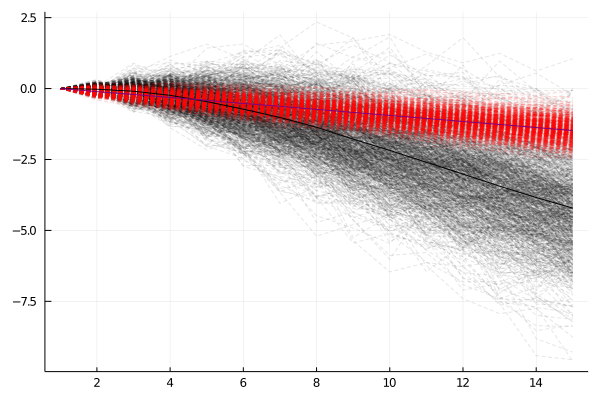

In [6]:
p_t_mean = mapslices(sum, p_t_ls; dims = 2)/K
logit_p_t = log.(p_t_ls./(1 .-p_t_ls))
logit_p_t_mean = mapslices(sum, logit_p_t; dims = 2)/K
mean_x_t = mapslices(sum, log.(x_t); dims = 2)/K

Plots.plot(log.(p_t_ls./(1 .-p_t_ls)), color = "black", alpha = 0.1, linestyle=:dash)
Plots.plot!(log.(x_t), color = "red", legend = false, alpha = 0.1, linestyle=:dash)
Plots.plot!(logit_p_t_mean, color = "black")
Plots.plot!(mean_x_t, color = "purple", legend = false)

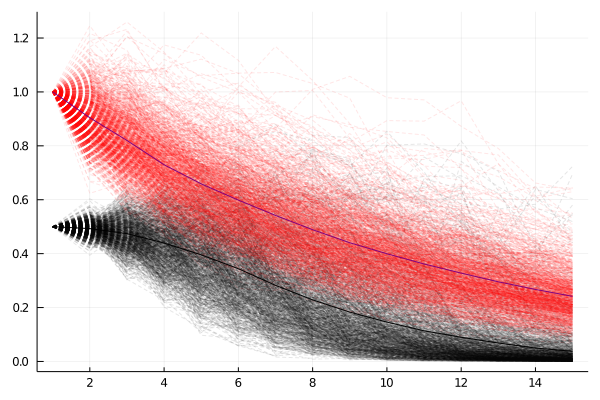

In [39]:


Plots.plot(p_t_ls, color = "black", alpha = 0.1, linestyle=:dash)
Plots.plot!(x_t, color = "red", legend = false, alpha = 0.1, linestyle=:dash)
Plots.plot!(mapslices(sum, p_t_ls; dims = 2)/K, color = "black")
Plots.plot!(mapslices(sum, x_t; dims = 2)/K, color = "purple", legend = false)

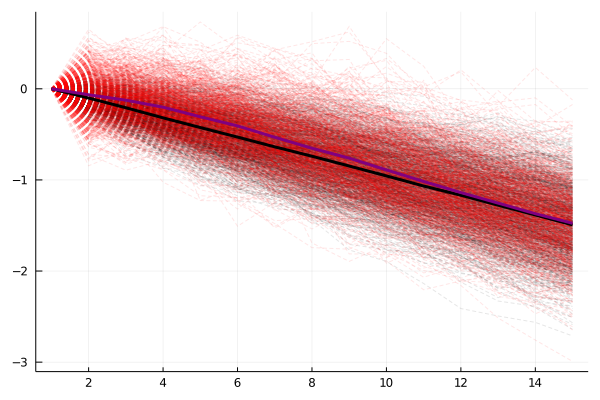

In [25]:
mean_x_t_mean = mapslices(sum, log.(x_t_mean); dims = 2)/K

Plots.plot(log.(x_t), color = "black", alpha = 0.1, linestyle=:dash)
Plots.plot!(log.(x_t_mean), color = "red", legend = false, alpha = 0.1, linestyle=:dash)
Plots.plot!(mean_x_t, color = "black", width = 3)
Plots.plot!(mean_x_t_mean, color = "purple", legend = false, width = 3)

In [18]:
include("stable_growth_filter.jl")

┌ Info: Precompiling NLsolve [2774e3e8-f4cf-5e23-947b-6d7e65073b56]
└ @ Base loading.jl:1278
ERROR: LoadError: LoadError: LoadError: UndefVarError: @constprop not defined
Stacktrace:
 [1] include(::Function, ::Module, ::String) at ./Base.jl:380
 [2] include at ./Base.jl:368 [inlined]
 [3] include(::String) at /Users/johnbuckner/.julia/packages/ArrayInterface/9nvRP/src/ArrayInterface.jl:1
 [4] top-level scope at /Users/johnbuckner/.julia/packages/ArrayInterface/9nvRP/src/ArrayInterface.jl:674
 [5] include(::Function, ::Module, ::String) at ./Base.jl:380
 [6] include(::Module, ::String) at ./Base.jl:368
 [7] top-level scope at none:2
 [8] eval at ./boot.jl:347 [inlined]
 [9] eval(::Expr) at ./client.jl:467
 [10] top-level scope at ./none:3
in expression starting at /Users/johnbuckner/.julia/packages/ArrayInterface/9nvRP/src/dimensions.jl:76
in expression starting at /Users/johnbuckner/.julia/packages/ArrayInterface/9nvRP/src/dimensions.jl:76
in expression starting at /Users/johnbuckner/.

LoadError: LoadError: [91mFailed to precompile NLsolve [2774e3e8-f4cf-5e23-947b-6d7e65073b56] to /Users/johnbuckner/.julia/compiled/v1.5/NLsolve/KFCNP_ru7eM.ji.[39m
in expression starting at /Users/johnbuckner/github/state_space_filters/stable_growth_filter.jl:4

In [13]:
sigma = 0.1
mu = -2.0
K = 0.1
E = stable_growth_filter.log_normal_mean(mu, sigma)+K
V = stable_growth_filter.log_normal_sigma(mu, sigma) 
x = stable_growth_filter.match_moments(E,V)

LoadError: [91mUndefVarError: log_normal_mean not defined[39m

In [14]:
d = Distributions.Normal(x[1],  x[2])
d2 = Distributions.Normal(mu, sigma)
Plots.histogram(exp.(rand(d,100000)), alpha = 0.5)
Plots.histogram!(exp.(rand(d2,100000)).+K, alpha = 0.5)

LoadError: [91mUndefVarError: x not defined[39m

In [15]:
# test belief updates
B = [0,0,0.1,0.1,0.5]
log_x_t = 0.0
r = 0.9
K = 1.0*(1-0.9)
sigma_nu = 0.1
sigma_omega = 0.1
d_process = Distributions.Normal(0,sigma_nu)
d_observation = Distributions.Normal(0,sigma_omega)
stable_growth_filter.update_beleifs(B,log_x_t,r,K,sigma_nu,sigma_omega, d_process,d_observation)

LoadError: [91mUndefVarError: update_beleifs not defined[39m

In [16]:
# Joint state and belief dynamics 
# set accumulators
N = 50
x_t_ls = zeros(N)
x_hat_ls = zeros(N)
p_ls = zeros(N)

# set paramters
B = [0,0,0.1,0.1,0.5]
log_x_t = 0.0
r = 0.9
K = 1.0
sigma_nu = 0.1
sigma_omega = 0.5
d_process = Distributions.Normal(0,sigma_nu)
d_observation = Distributions.Normal(0,sigma_omega)
#state_transition = x->stable_growth_filter.update_states_H1(x,r, d)

# simulations
for i in 1:N
    # accumulte
    x_t_ls[i] = exp(log_x_t)
    x_hat_ls[i] = exp(B[1])*B[5] + exp(B[2])*(1-B[5])
    p_ls[i] = B[5]
    # update
    log_x_t = stable_growth_filter.update_states_H1(log_x_t,r,d_process)
    B = stable_growth_filter.update_beleifs(B,log_x_t,r,K,sigma_nu,sigma_omega, d_process,d_observation)
end 

# plots
Plots.plot(x_t_ls, color = "black")
Plots.plot!(x_hat_ls, color = "black", linestyle =:dash)
Plots.plot!(p_ls, color = "red")


LoadError: [91mUndefVarError: update_states_H1 not defined[39m

In [17]:
# Joint state and belief dynamics 
# set accumulators
N = 50
M = 100
x_t_ls = zeros(N,M)
x_hat_ls = zeros(N,M)
p_ls = zeros(N,M)

for j in 1:M
    # set paramters/ states
    B = [0,0,0.1,0.1,0.5]
    log_x_t = 0.0
    r = 0.8
    sigma_nu = 0.3
    K = 1.0
    sigma_omega =0.001
    
    d_process = Distributions.Normal(0,sigma_nu)
    d_observation = Distributions.Normal(0,sigma_omega)

    # simulations
    for i in 1:N
        # accumulte
        x_t_ls[i,j] = exp(log_x_t)
        x_hat_ls[i,j] = exp(B[1])*B[5] + exp(B[2])*(1-B[5])
        p_ls[i,j] = B[5]
        # update
        log_x_t = stable_growth_filter.update_states_H1(log_x_t,r,d_process)
        B = stable_growth_filter.update_beleifs(B,log_x_t,r,K,sigma_nu,sigma_omega, d_process,d_observation)
    end 
end 
# plots
Plots.plot(x_t_ls, color = "black", alpha = 0.1)
Plots.plot!(x_hat_ls, color = "blue", linestyle =:dash, alpha = 0.1)
Plots.plot!(p_ls, color = "red", alpha = 0.1)

x_t_ls = mapslices(sum, x_t_ls; dims = 2)/M
x_hat_ls = mapslices(sum, x_hat_ls; dims = 2)/M
p_ls = mapslices(sum, p_ls; dims = 2)/M

Plots.plot!(x_t_ls, color = "black", width = 3)
Plots.plot!(x_hat_ls, color = "blue", linestyle =:dash, width = 3)
Plots.plot!(p_ls, color = "red", width = 3, legend =  false)

LoadError: [91mUndefVarError: update_states_H1 not defined[39m

In [1]:
a = zeros(10,10)

10×10 Matrix{Float64}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0

In [275]:
function prior(N)
    d = Distributions.Normal()
    x = rand(d,N)
    d = Distributions.Beta(0.5,0.5)
    rho = rand(d,N)
    d = Distributions.Gamma(10,0.05)
    sigma_x = rand(d,N)
    return hcat(x,rho,sigma_x)
end 

function process!(X_t)
    x = X_t[1]
    rho = X_t[2]
    sigma_x = X_t[3]
    d = Distributions.Normal(0,sigma_x)
    x = rho*x + rand(d,1)[1]
    X_t[1] = x
    return X_t
end 


function observaiton(y_t,X_t)
    x = X_t[1]
    d = Distributions.LogNormal(x,0.1)
    return pdf(d,y_t)
end 


function noise!(X_t)
    X_t[2] = X_t[2] + 0.01*(rand()[1]-0.5)
    if X_t[2] > 1
        X_t[2] = 1.0
    elseif X_t[2] < 0
        X_t[2] = 0.0
    end
    X_t[3] = X_t[3]+0.005*(rand()[1]-0.5)
    if X_t[3] < 0.0
        X_t[3] = 0.01
    end
    return X_t
end 

noise! (generic function with 1 method)

In [276]:
include("particle_filter.jl")

Main.particle_filter

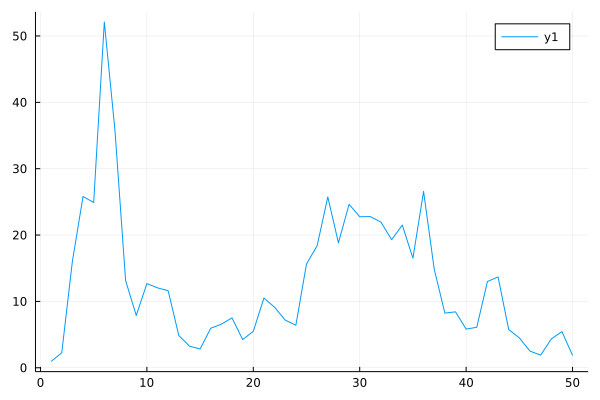

In [277]:
x = 0
rho = 0.9
sigma_x = 0.5
sigma_y = 0.1
T = 50
y_t = zeros(T)
for t in 1:T
    d = Distributions.LogNormal(x,sigma_y)
    y_t[t] = rand(d,1)[1]
    x = rho*x+rand(Distributions.Normal(0,sigma_x))
end
Plots.plot(y_t)

In [ ]:

include("particle_filter.jl")
model = particle_filter.POMP(prior,process!,observaiton)
before1,after1 = particle_filter.blury_filter(model, y_t, noise!; N=50000)
print(" ")

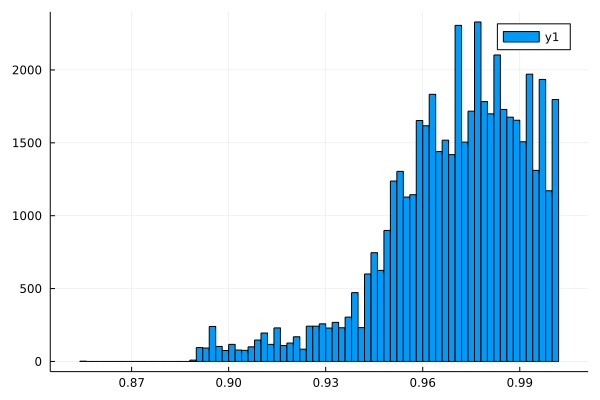

In [279]:
Plots.histogram(before[:,2,50])

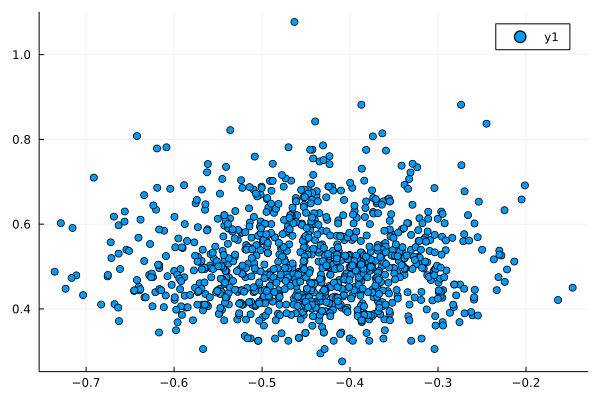

In [224]:
Plots.scatter(before[1:1000,1,10],before[1:1000,3,10] )

In [3]:
using Distributions
using Plots

┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1278


In [17]:
d = Distributions.Normal(0,0.05)
update(x) = (0.9*x + 0.1)*exp(rand(d,1)[1])

update (generic function with 1 method)

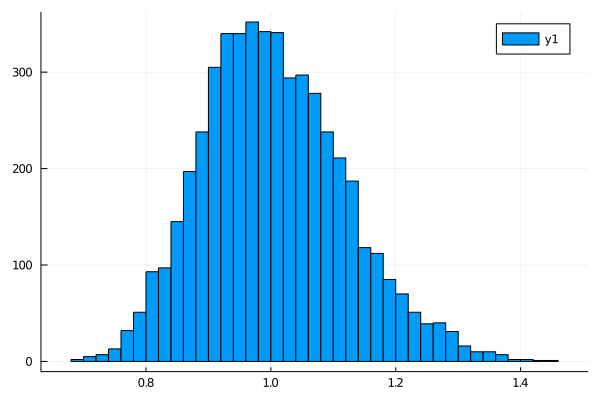

In [18]:
N = 5000
xt = zeros(N)
x = 1.0
for i in 1:N
    x = update(x)
    xt[i] = x
end 
Plots.histogram(xt)